# sin rnn
The purpose of this notebook is to attempt to fit an RNN to a sin series.

## imports

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

## data
The below class will be able to create a sin series, in addition to batching.

In [53]:
class TimeSeriesData():
    def __init__(self, num_points, xmin, xmax):
        #data range
        self.xmin = xmin
        self.xmax = xmax
        #data space resolution
        self.num_points = num_points
        self.resolution = (xmax - xmin) / num_points
        #defining the domain and range
        self.x_data = np.linspace(start=xmin, stop=xmax, num=num_points)
        self.y_true = np.sin(self.x_data)
        
    def ret_true(self, x_series):
        """
        Returns np.sin(x_series) for ANY range of inputs in x_series. This method
        will be used for comparing validity of new data.
        """
        return np.sin(x_series)
    
    def next_batch(self, batch_size, steps, return_batch_ts=False):
        #grab random starting point for each batch
        rand_start = np.random.rand(batch_size, 1)
        #convert to be on time series
        ts_start = rand_start * (self.xmax - self.xmin - steps * self.resolution)
        #create batch time series on x axis
        batch_ts = ts_start + np.arange(0, steps+1) * self.resolution
        #create y data for time series x axis
        y_batch = self.ret_true(batch_ts)
        #formatting for rnn
        if return_batch_ts:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1), batch_ts
        else:
            return y_batch[:,:-1].reshape(-1, steps, 1), y_batch[:,1:].reshape(-1, steps, 1)

In [57]:
ts_data = TimeSeriesData(250, 0, 10)

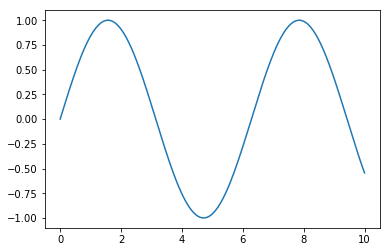

In [58]:
plt.plot(ts_data.x_data, ts_data.y_true)

## batching

In [59]:
num_time_steps = 30

In [60]:
y1, y2, ts = ts_data.next_batch(1, num_time_steps, return_batch_ts=True)

In [62]:
ts.shape

(1, 31)

In [61]:
ts

array([[ 6.95283695,  6.99283695,  7.03283695,  7.07283695,  7.11283695,
         7.15283695,  7.19283695,  7.23283695,  7.27283695,  7.31283695,
         7.35283695,  7.39283695,  7.43283695,  7.47283695,  7.51283695,
         7.55283695,  7.59283695,  7.63283695,  7.67283695,  7.71283695,
         7.75283695,  7.79283695,  7.83283695,  7.87283695,  7.91283695,
         7.95283695,  7.99283695,  8.03283695,  8.07283695,  8.11283695,
         8.15283695]])

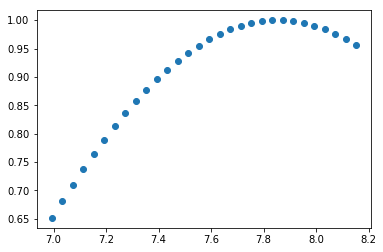

In [65]:
plt.plot(ts.flatten()[1:], y2.flatten(), "o")

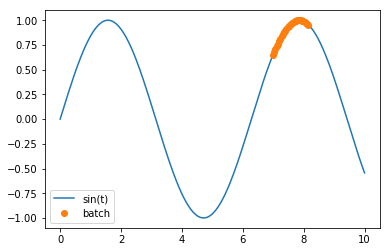

In [68]:
plt.plot(ts_data.x_data, ts_data.y_true, label="sin(t)")
plt.plot(ts.flatten()[1:], y2.flatten(), "o", label="batch")
plt.legend()

## training data

In [70]:
train_inst = np.linspace(5, 5 + ts_data.resolution*(num_time_steps + 1), num_time_steps + 1)
train_inst

array([ 5.        ,  5.04133333,  5.08266667,  5.124     ,  5.16533333,
        5.20666667,  5.248     ,  5.28933333,  5.33066667,  5.372     ,
        5.41333333,  5.45466667,  5.496     ,  5.53733333,  5.57866667,
        5.62      ,  5.66133333,  5.70266667,  5.744     ,  5.78533333,
        5.82666667,  5.868     ,  5.90933333,  5.95066667,  5.992     ,
        6.03333333,  6.07466667,  6.116     ,  6.15733333,  6.19866667,
        6.24      ])

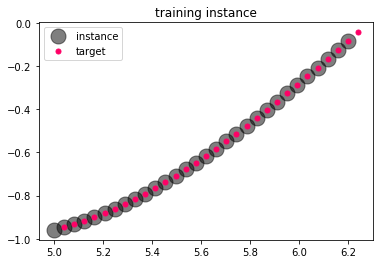

In [75]:
plt.title("training instance")
plt.plot(train_inst[:-1], ts_data.ret_true(train_inst[:-1]), "ko", markersize=15, alpha=0.5, label="instance")
plt.plot(train_inst[1:], ts_data.ret_true(train_inst[1:]), "o", markersize=5, alpha=1, label="target", color="#ff0066")
plt.legend()